<a href="https://colab.research.google.com/github/StevenJourney/Computer_Vision/blob/main/Face_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
path = '/content/drive/MyDrive/Ah Hao/Computer Vision Masterclass/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

### Pre-processing the images

In [ ]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject09.surprised.gif', 'subject08.centerlight.gif', 'subject05.noglasses.gif', 'subject12.happy.gif', 'subject10.noglasses.gif', 'subject10.glasses.gif', 'subject09.noglasses.gif', 'subject14.rightlight.gif', 'subject03.surprised.gif', 'subject01.normal.gif', 'subject02.rightlight.gif', 'subject02.wink.gif', 'subject01.rightlight.gif', 'subject10.sleepy.gif', 'subject13.normal.gif', 'subject14.glasses.gif', 'subject02.sad.gif', 'subject04.glasses.gif', 'subject07.rightlight.gif', 'subject03.noglasses.gif', 'subject07.surprised.gif', 'subject15.centerlight.gif', 'subject05.leftlight.gif', 'subject13.happy.gif', 'subject12.glasses.gif', 'subject13.rightlight.gif', 'subject06.rightlight.gif', 'subject12.leftlight.gif', 'subject14.wink.gif', 'subject01.surprised.gif', 'subject13.leftlight.gif', 'subject14.noglasses.gif', 'subject12.wink.gif', 'subject05.wink.gif', 'subject11.centerlight.gif', 'subject12.noglasses.gif', 'subject05.sad.gif', 'subject10.wink.gif', 'subject01.glasses.gif'

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')] # Joining the path
  #print(paths)
  faces = []
  ids = []
  for path in paths:
    #print(path)
    image = Image.open(path).convert('L') # L mode = converting from colored image to grayscle
    # print(type(image))
    image_np = np.array(image, 'uint8')
    # print(type(image))
    id = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
    # print(id)
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces


In [ ]:
ids, faces = get_image_data()

In [ ]:
ids

array([ 9,  8,  5, 12, 10, 10,  9, 14,  3,  1,  2,  2,  1, 10, 13, 14,  2,
        4,  7,  3,  7, 15,  5, 13, 12, 13,  6, 12, 14,  1, 13, 14, 12,  5,
       11, 12,  5, 10,  1,  5,  8, 13,  2, 15, 13,  4,  7,  3, 14,  6,  3,
        4, 11,  6,  4,  7,  5,  4, 13,  2, 13,  3,  3,  3,  5,  7,  9, 11,
       11,  6, 15,  9,  9,  7,  8,  4, 14,  8,  6,  3,  2,  7, 13,  8, 15,
        2, 15,  2,  2,  6,  5, 10,  9,  1, 15,  6, 10, 10, 12, 11,  6,  1,
        7, 15, 11, 11,  1, 14,  1, 10, 12,  7, 15, 11,  9, 11,  8, 12, 15,
        6, 14,  5,  3,  4,  8,  9,  4, 12,  8,  4, 14,  8,  1,  9, 10])

In [ ]:
len(ids)

135

In [ ]:
len(faces)

135

In [ ]:
faces[0], faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 246, 243],
        [255, 255, 255, ..., 255, 239, 241],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

In [ ]:
243 * 320 # one image contain 77760 pixels

77760

### Training the LBPH classifier

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

### Recognizing Faces

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

In [ ]:
test_image = '/content/yalefaces/test/subject12.normal.gif'
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')

In [ ]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(12, 0.0)

In [ ]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))
expected_output # extract the result from the name

12

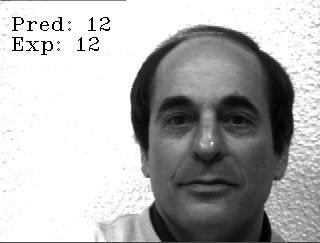

In [ ]:
cv2.putText(image_np, 'Pred: ' + str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(image_np, 'Exp: ' + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(image_np)

### Evauating the face classifier

In [ ]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
  # print(path)
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject',''))

  expected_outputs.append(expected_output)
  predictions.append(prediction)


In [ ]:
predictions=np.array(predictions)
expected_outputs=np.array(expected_outputs)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(expected_outputs, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2
           4       0.25      0.50      0.33         2
           5       0.67      1.00      0.80         2
           6       1.00      0.50      0.67         2
           7       0.33      0.50      0.40         2
           8       1.00      0.50      0.67         2
           9       0.25      0.50      0.33         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       0.67      1.00      0.80         2
          15       1.00      0.50      0.67         2

    accuracy                           0.67        30
   macro avg       0.74      0.67      0.67        30
weighted avg       0.74   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
len(predictions)

30

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs,predictions )

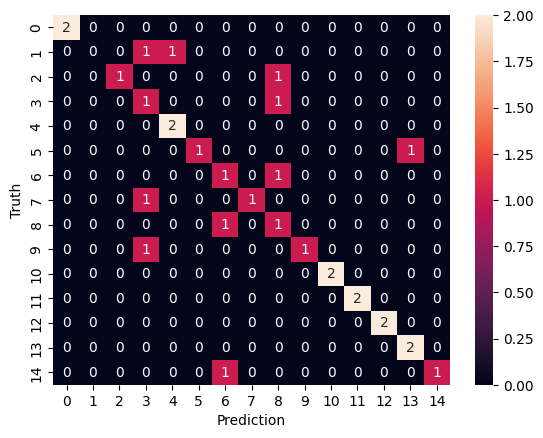

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth');

### LBPH Params
1. Radius (default = 1)
2. Neighbors (default = 8)
3. grid_x and grid_y (default = 8, 8)
4. Threshold (~1.79e+308)

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius = 4, neighbors=14, grid_x = 9, grid_y = 9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier_after_params2.yml')




In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier_after_params2.yml')

In [ ]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
  #print(path)
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

0.7

### Dlib

In [ ]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

### Detecting facial points

In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Computer Vision/Computer Vision Masterclass (1)/Weights/shape_predictor_68_face_landmarks.dat')

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision/Computer Vision Masterclass (1)/Images/460146574_8172666769435988_5914554920368560460_n.jpg')

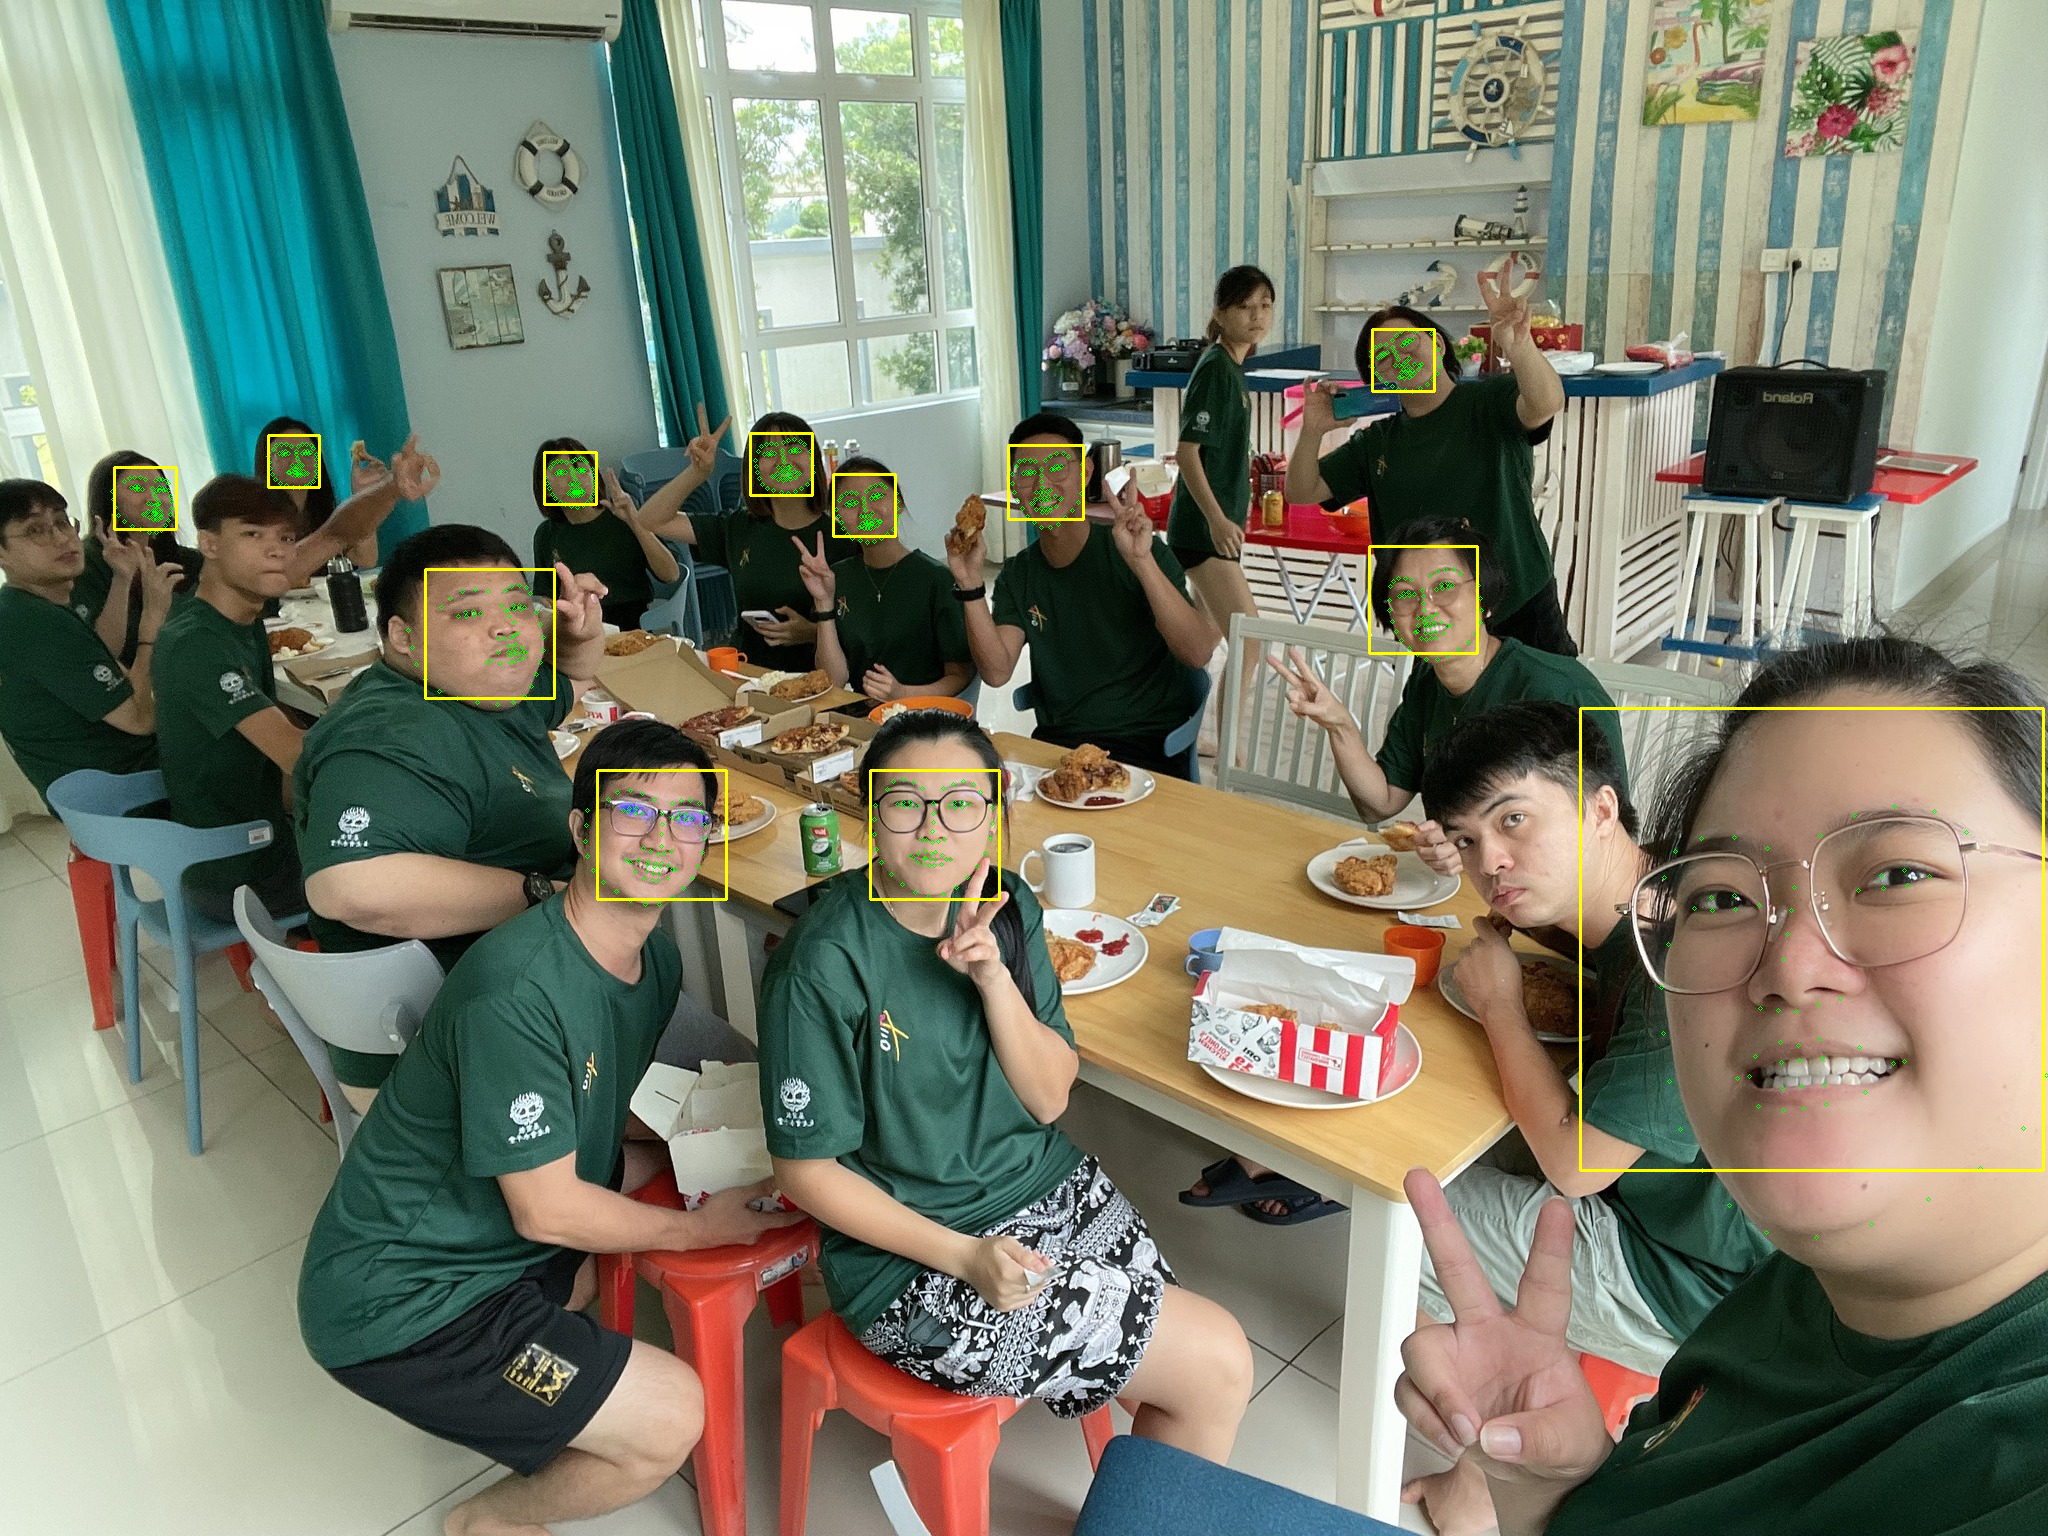

In [ ]:
face_detection = face_detector(image, 1)
for face in face_detection:
  points = points_detector(image, face)
  for point in points.parts():
    cv2.circle(image, (point.x, point.y), 2, (0,255,0), 1)

  #print(points.parts())
  #print(len(points.parts()))

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0,255,255), 2)
cv2_imshow(image)

### Detecting facial descriptors (68 points)

In [ ]:
import os
import dlib

In [ ]:
# Resnet: https://arxiv.org/abs/1512.03385

face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Ah Hao/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1('/content/drive/MyDrive/Ah Hao/Computer Vision Masterclass/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [ ]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  # print(path)
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8') # pixels are representing by integer values
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np, (l,t), (r,b), (0,0,255),2)

    points = points_detector(image_np, face)
    for point in points.parts():
      cv2.circle(image_np,(point.x, point.y), 2,(0,255,0),1)

    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    # print(type(face_descriptor))
    # print(len(face_descriptor))
    # print(face_descriptor)
    face_descriptor = [f for f in face_descriptor]
    # print(face_descriptor)
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    # print(face_descriptor)
    # print(face_descriptor.shape,type(face_descriptor))
    face_descriptor = face_descriptor[np.newaxis, :]
    # print(face_descriptor.shape)
    # print(face_descriptor)

    if face_descriptors is None:
      face_descriptors = face_descriptor
    else:
      face_descriptors = np.concatenate((face_descriptors, face_descriptor),axis = 0) # combining

    index[idx] = path
    idx += 1



  # cv2_imshow(image_np)

In [ ]:
face_descriptors.shape #132 picture with 128 features

(132, 128)

In [ ]:
len(index)

132

In [ ]:
index

{0: '/content/yalefaces/train/subject12.leftlight.gif',
 1: '/content/yalefaces/train/subject07.noglasses.gif',
 2: '/content/yalefaces/train/subject09.centerlight.gif',
 3: '/content/yalefaces/train/subject07.sad.gif',
 4: '/content/yalefaces/train/subject07.rightlight.gif',
 5: '/content/yalefaces/train/subject04.noglasses.gif',
 6: '/content/yalefaces/train/subject12.noglasses.gif',
 7: '/content/yalefaces/train/subject14.happy.gif',
 8: '/content/yalefaces/train/subject15.surprised.gif',
 9: '/content/yalefaces/train/subject08.sleepy.gif',
 10: '/content/yalefaces/train/subject13.normal.gif',
 11: '/content/yalefaces/train/subject10.normal.gif',
 12: '/content/yalefaces/train/subject10.leftlight.gif',
 13: '/content/yalefaces/train/subject01.normal.gif',
 14: '/content/yalefaces/train/subject15.normal.gif',
 15: '/content/yalefaces/train/subject02.happy.gif',
 16: '/content/yalefaces/train/subject07.centerlight.gif',
 17: '/content/yalefaces/train/subject14.rightlight.gif',
 18: '/

### Calculating the distance between faces

In [ ]:
face_descriptors[0]

array([-0.04637892,  0.10031767,  0.06069502, -0.01644978, -0.02841887,
       -0.09561458, -0.01604768, -0.07247467,  0.1962803 , -0.04349452,
        0.24152553, -0.01014975, -0.25285172,  0.08644202, -0.14164604,
        0.16064733, -0.08477645, -0.03075077, -0.15326782, -0.12745444,
        0.07302654,  0.07169645,  0.00162782,  0.00830235, -0.13842721,
       -0.20346949, -0.12848803, -0.08230725,  0.10776472, -0.08765665,
       -0.02094891,  0.03429794, -0.15403944, -0.09199205,  0.06182397,
       -0.03404114, -0.04465283, -0.03943221,  0.25223246,  0.13940874,
       -0.1612635 ,  0.12306497,  0.04465122,  0.32670939,  0.13290401,
        0.05787584,  0.04538531, -0.13315457,  0.04616889, -0.25323284,
        0.04501993,  0.14440325,  0.16161945,  0.07699665,  0.10883982,
       -0.19003977,  0.0210973 ,  0.08726907, -0.21350092,  0.16160393,
        0.14492729, -0.03232213, -0.04495703, -0.02724168,  0.1507196 ,
        0.10252184, -0.13932215, -0.04853784,  0.25161242, -0.12

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html#numpy.linalg.norm
np.linalg.norm(face_descriptors[131] - face_descriptors[131]) # comparing same faces

0.0

In [ ]:
np.linalg.norm(face_descriptors[86] - face_descriptors[72]) # comparing same faces

0.4842575387159702

In [ ]:
np.linalg.norm(face_descriptors[126] - face_descriptors, axis =1) # comparing same faces

array([0.80494417, 0.69519183, 0.69835742, 0.6957223 , 0.75188035,
       0.4969039 , 0.82081721, 0.51189215, 0.75924362, 0.58641494,
       0.69107266, 0.66809436, 0.70031927, 0.76413915, 0.70501388,
       0.7411971 , 0.748699  , 0.57447502, 0.46351493, 0.65036371,
       0.51884136, 0.81324411, 0.35611428, 0.79367076, 0.36435516,
       0.64144554, 0.52174662, 0.72221316, 0.75155105, 0.67004982,
       0.53900787, 0.67029254, 0.63300485, 0.73218458, 0.2006965 ,
       0.68616974, 0.68823531, 0.50005989, 0.82532069, 0.70161901,
       0.75534649, 0.72710297, 0.60024867, 0.78137059, 0.60593685,
       0.60993776, 0.67719182, 0.73743174, 0.78562813, 0.79762717,
       0.76813636, 0.7394837 , 0.65578436, 0.69707684, 0.66521342,
       0.64726349, 0.39106159, 0.50160827, 0.72890451, 0.6674423 ,
       0.        , 0.63778236, 0.80880636, 0.50159532, 0.78524395,
       0.68867836, 0.80462186, 0.64830111, 0.66722364, 0.70685901,
       0.49989885, 0.71629693, 0.68154088, 0.77874693, 0.83290

In [ ]:
np.argmin(np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis =1)) #compare 1 face to other faces

20

In [ ]:
np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis =1)[20]

0.30940167850766614

### Detecting faces with Dlib

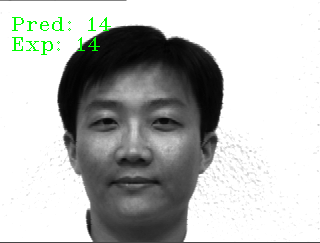

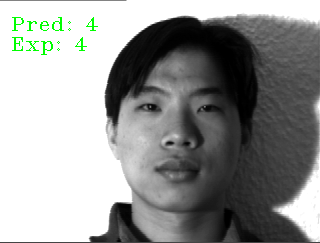

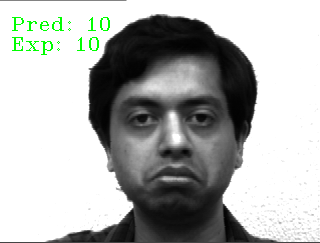

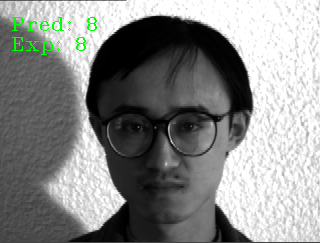

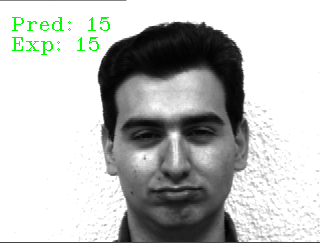

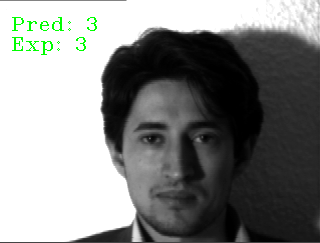

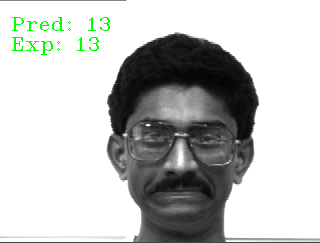

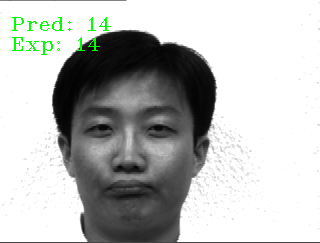

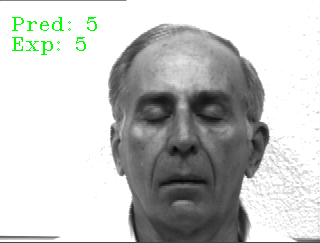

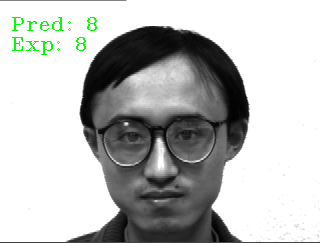

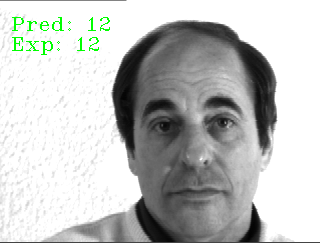

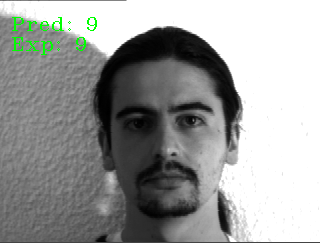

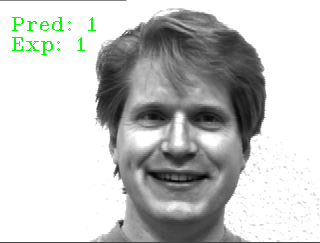

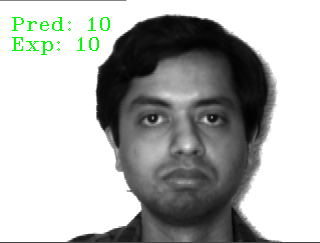

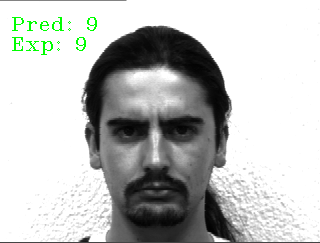

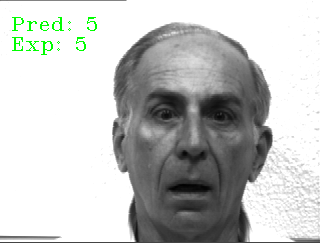

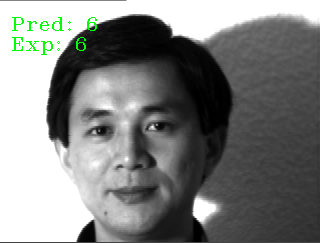

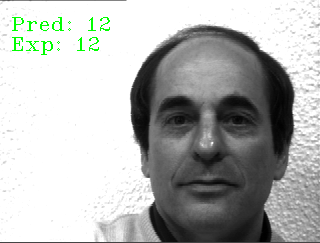

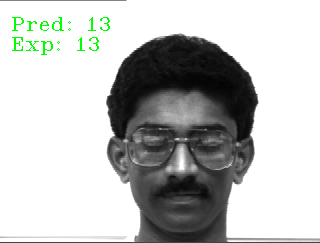

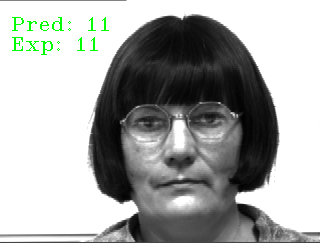

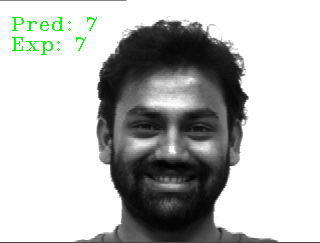

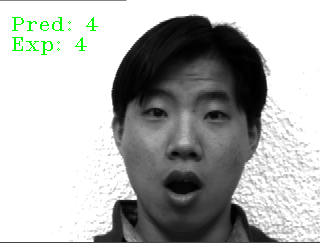

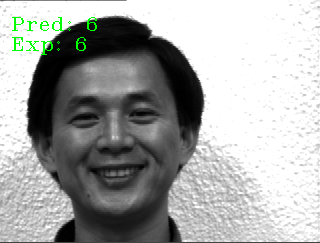

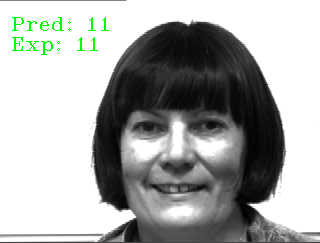

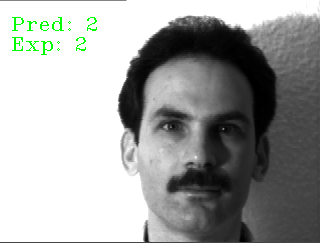

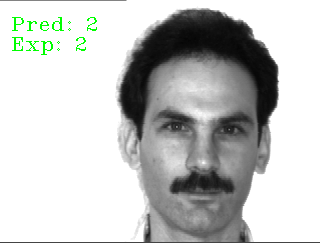

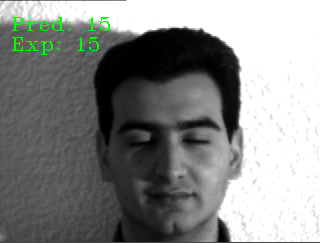

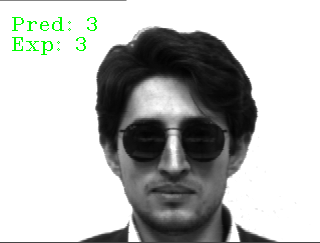

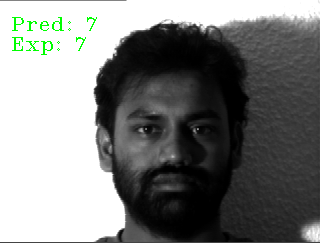

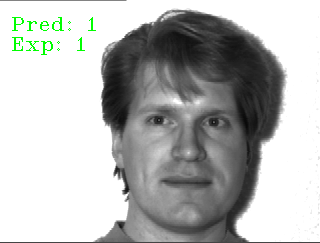

In [ ]:
threshold = 0.5
predictions = []
expected_outputs = []

paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np,1) # 1 is the scale of the image
  for face in face_detection:
    points = points_detector(image_np, face)
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    face_descriptor = face_descriptor[np.newaxis, :]

    distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1 ) # face_descriptors are the train array
    min_index = np.argmin(distances)
    min_distance = distances[min_index]
    if min_distance <= threshold:
      name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
    else:
      name_pred = 'Not Identitfied'

    name_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    predictions.append(name_pred)
    expected_outputs.append(name_real)

    cv2.putText(image_np, 'Pred: ' +str(name_pred), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,255,0))
    cv2.putText(image_np, 'Exp: ' +str(name_real), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,255,0))

  cv2_imshow(image_np)

predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [ ]:
predictions

[14,
 4,
 10,
 8,
 15,
 3,
 13,
 14,
 5,
 8,
 12,
 9,
 1,
 10,
 9,
 5,
 6,
 12,
 13,
 11,
 7,
 4,
 6,
 11,
 2,
 2,
 15,
 3,
 7,
 1]

In [ ]:
predictions

array([14,  4, 10,  8, 15,  3, 13, 14,  5,  8, 12,  9,  1, 10,  9,  5,  6,
       12, 13, 11,  7,  4,  6, 11,  2,  2, 15,  3,  7,  1])

In [ ]:
expected_outputs

array([14,  4, 10,  8, 15,  3, 13, 14,  5,  8, 12,  9,  1, 10,  9,  5,  6,
       12, 13, 11,  7,  4,  6, 11,  2,  2, 15,  3,  7,  1])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(predictions,expected_outputs))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00   